In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#reading files
df=pd.read_csv("Testfile.csv")
tf=pd.read_csv("Trainfile.csv")

In [2]:
print(df.head())
print(tf.head())

   Idx  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          20       RL         68.0     9571   Pave   NaN      Reg   
1    2          20       RL          NaN     9790   Pave   NaN      Reg   
2    3          60       RL         41.0    12393   Pave   NaN      IR2   
3    4          20       RL        100.0    10004   Pave   NaN      Reg   
4    5          45       RL         55.0     5500   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      6   2009       COD        Abnorml    

Data Preprocessing

In [3]:
X=df.drop(['Idx','SalePrice'],1)
Y=df.SalePrice
x=tf.drop(['Idx','SalePrice'],1)
y=tf.SalePrice

In [4]:
print(x)
print(y)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             45       RL         59.0     7227   Pave   NaN      Reg   
1             60       RL          NaN    12227   Pave   NaN      IR1   
2             20       RL         65.0     7800   Pave   NaN      Reg   
3             60       RL         88.0    12665   Pave   NaN      IR1   
4             20       RL        105.0    15431   Pave   NaN      Reg   
...          ...      ...          ...      ...    ...   ...      ...   
1133          20       RL         64.0     6762   Pave   NaN      Reg   
1134          80       RL         88.0     8471   Pave   NaN      IR1   
1135          20       RL         70.0     8414   Pave   NaN      Reg   
1136          20       RL          NaN    11838   Pave   NaN      Reg   
1137          20       RL         85.0    11049   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            HLS    AllPub    Corner  ...  

In [5]:
#Encoding data
numbers=[]
for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        numbers=numbers+[unique_cat]
        print(f"feature '{col_name}' has {unique_cat} unique categories")
       # print(f"X['{col_name}']=le.fit_transform(X['{col_name}'])")
       

feature 'MSZoning' has 5 unique categories
feature 'Street' has 2 unique categories
feature 'Alley' has 3 unique categories
feature 'LotShape' has 4 unique categories
feature 'LandContour' has 4 unique categories
feature 'Utilities' has 1 unique categories
feature 'LotConfig' has 5 unique categories
feature 'LandSlope' has 3 unique categories
feature 'Neighborhood' has 25 unique categories
feature 'Condition1' has 9 unique categories
feature 'Condition2' has 5 unique categories
feature 'BldgType' has 5 unique categories
feature 'HouseStyle' has 8 unique categories
feature 'RoofStyle' has 6 unique categories
feature 'RoofMatl' has 8 unique categories
feature 'Exterior1st' has 14 unique categories
feature 'Exterior2nd' has 16 unique categories
feature 'MasVnrType' has 5 unique categories
feature 'ExterQual' has 4 unique categories
feature 'ExterCond' has 4 unique categories
feature 'Foundation' has 6 unique categories
feature 'BsmtQual' has 5 unique categories
feature 'BsmtCond' has 5 un

In [6]:
todummy_list=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [7]:
print(numbers)

[5, 2, 3, 4, 4, 1, 5, 3, 25, 9, 5, 5, 8, 6, 8, 14, 16, 5, 4, 4, 6, 5, 5, 5, 7, 7, 6, 5, 2, 6, 4, 7, 6, 7, 4, 6, 6, 3, 4, 5, 4, 8, 6]


In [8]:
#Filling the nullvalues
X.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          320
MiscFeature     310
Alley           297
Fence           265
FireplaceQu     150
LotFrontage      59
GarageType       13
GarageFinish     13
GarageQual       13
GarageCond       13
GarageYrBlt      13
BsmtCond          7
BsmtExposure      7
BsmtFinType2      7
BsmtFinType1      7
BsmtQual          7
MasVnrArea        2
MasVnrType        2
RoofStyle         0
RoofMatl          0
dtype: int64

In [9]:
#dropping columns with excess null Values
X=X.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','Utilities'],axis=1)
x=x.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','Utilities'],axis=1)

In [10]:
X.isnull().sum().sort_values(ascending=False).head(20)

GarageType      13
GarageYrBlt     13
GarageFinish    13
GarageQual      13
GarageCond      13
BsmtFinType2     7
BsmtFinType1     7
BsmtExposure     7
BsmtCond         7
BsmtQual         7
MasVnrType       2
MasVnrArea       2
YearRemodAdd     0
ExterQual        0
Exterior2nd      0
Exterior1st      0
ExterCond        0
Foundation       0
BsmtFinSF1       0
RoofMatl         0
dtype: int64

In [11]:
x.isnull().sum().sort_values(ascending=False).head(20)

GarageCond      68
GarageType      68
GarageYrBlt     68
GarageFinish    68
GarageQual      68
BsmtFinType2    31
BsmtExposure    31
BsmtFinType1    30
BsmtCond        30
BsmtQual        30
MasVnrType       6
MasVnrArea       6
Electrical       1
YearRemodAdd     0
ExterQual        0
ExterCond        0
Exterior2nd      0
Foundation       0
BsmtFinSF1       0
Exterior1st      0
dtype: int64

In [12]:
#filling null
X['BsmtFinType2']=X['BsmtFinType2'].fillna( method ='ffill') 
X['GarageCond']=X['GarageCond'].fillna( method ='ffill')
X['GarageQual']=X['GarageQual'].fillna( method ='ffill')
X['BsmtCond']=X['BsmtCond'].fillna( method ='ffill')
X['GarageType']=X['GarageType'].fillna( method ='ffill') 
X['GarageYrBlt']=X['GarageYrBlt'].fillna( method ='ffill') 
X['GarageFinish']=X['GarageFinish'].fillna( method ='ffill') 
X['BsmtFinType1']=X['BsmtFinType1'].fillna( method ='ffill') 
X['BsmtQual']=X['BsmtQual'].fillna( method ='ffill') 
X['BsmtExposure']=X['BsmtExposure'].fillna( method ='ffill') 
X['MasVnrType']=X['MasVnrType'].fillna( method ='ffill') 
X['MasVnrArea']=X['MasVnrArea'].fillna( method ='ffill') 

In [13]:
x['BsmtFinType2']=x['BsmtFinType2'].fillna( method ='ffill') 
x['GarageCond']=x['GarageCond'].fillna( method ='ffill')
x['GarageQual']=x['GarageQual'].fillna( method ='ffill')
x['BsmtCond']=x['BsmtCond'].fillna( method ='ffill')
x['GarageType']=x['GarageType'].fillna( method ='ffill') 
x['GarageYrBlt']=x['GarageYrBlt'].fillna( method ='ffill') 
x['GarageFinish']=x['GarageFinish'].fillna( method ='ffill') 
x['BsmtFinType1']=x['BsmtFinType1'].fillna( method ='ffill') 
x['BsmtQual']=x['BsmtQual'].fillna( method ='ffill') 
x['BsmtExposure']=x['BsmtExposure'].fillna( method ='ffill') 
x['MasVnrType']=x['MasVnrType'].fillna( method ='ffill') 
x['MasVnrArea']=x['MasVnrArea'].fillna( method ='ffill')
x['Electrical']=x['Electrical'].fillna( method ='ffill')

In [14]:
X.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
SaleType         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
dtype: int64

In [15]:
x.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
SaleType         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
dtype: int64

In [16]:
#final Labelencoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in todummy_list:
    X[col]=le.fit_transform(X[col])
    x[col]=le.fit_transform(x[col])

In [18]:
#Normalising/scaling the data
x =(x-x.mean())/(x.max()-x.min())
X=(X-X.mean())/(X.max()-X.min())

In [19]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [20]:
x=(x.T).to_numpy()
y=(y.T).to_numpy()
X=(X.T).to_numpy()
Y=(Y.T).to_numpy()

In [21]:
print(x.shape,y.shape,X.shape,Y.shape)

(72, 1138) (1, 1138) (72, 322) (1, 322)


Multivariate Linear Regression Model

In [22]:
def initialize_parameters(lenw):
    w= np.random.randn(lenw,1)
    b = 0
    return w,b

In [23]:
def cost_function(x,y,w,b):
    z = np.dot(w.T,x)+b
    m = x.shape[1]
    J = (1/2*m)*np.sum(np.square(z - y))
    return J

In [24]:
def forward_n_backward_prop(x,y,w,b):
    m = x.shape[1]
    z = np.dot(w.T,x)+b
    dw = np.dot(x,(z-y).T)/m
    db = np.sum(z-y)/m
    return dw,db    

In [25]:
def gradient_descent_update(x,y,w,b,alpha,iters):
    costs=[]
    for i in range(iters):
        dw,db = forward_n_backward_prop(x,y,w,b)
        cost = cost_function(x,y,w,b)
        w = w-dw*alpha
        b = b-db*alpha
        
        if i%100==0 and i!=0:
            costs.append(cost)
            print('Updated cost after ',i,' iterations= ',cost)
            
    return w,b,costs

In [26]:
def prediction(w,b,x):
    m = x.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(x.shape[0], 1)
    
    z = np.dot(w.T,x) + b
    
    for i in range(z.shape[1]):
        Y_pred[0,i] = z[0,i]
    
    return Y_pred

In [28]:
def linear_regression_model(x,y,X,Y,alpha,iters):
    ct_list=[]
    
    lenw = x.shape[0]
    w,b = initialize_parameters(lenw)
    
    w,b,ct_list = gradient_descent_update(x,y,w,b,alpha,iters)    
    y_prediction = prediction(w,b,x)
    Y_prediction = prediction(w,b,X)
    
    mean_y=np.mean(y)
    mean_Y=np.mean(Y)
    
    train_MAPE = (np.mean(np.abs(y_prediction-y))*100)/mean_y
    test_MAPE = (np.mean(np.abs(Y_prediction-Y))*100)/mean_Y
    
    print("training MAPE: ",train_MAPE)
    print("test MAPE: ",test_MAPE)
    print('AbhilashDatta_'+str(100-test_MAPE)+'.ipynb')
 
    plt.plot(ct_list)
    plt.xlabel('Iterations (per tens)')
    plt.ylabel('Training cost')
    plt.title('Learning rate '+str(alpha))
    plt.show()

Updated cost after  100  iterations=  1.7266400895153096e+16
Updated cost after  200  iterations=  1.227175226287849e+16
Updated cost after  300  iterations=  8872134509996193.0
Updated cost after  400  iterations=  6550711786541425.0
Updated cost after  500  iterations=  4959270738881082.0
Updated cost after  600  iterations=  3862978980764718.5
Updated cost after  700  iterations=  3103288057764218.5
Updated cost after  800  iterations=  2573011343532480.5
Updated cost after  900  iterations=  2199573366854565.2
Updated cost after  1000  iterations=  1933745179136511.2
Updated cost after  1100  iterations=  1742064166529659.8
Updated cost after  1200  iterations=  1601729367578637.5
Updated cost after  1300  iterations=  1497160838740531.0
Updated cost after  1400  iterations=  1417678236687973.5
Updated cost after  1500  iterations=  1355932672085593.0
Updated cost after  1600  iterations=  1306845935978313.2
Updated cost after  1700  iterations=  1266891782640215.0
Updated cost aft

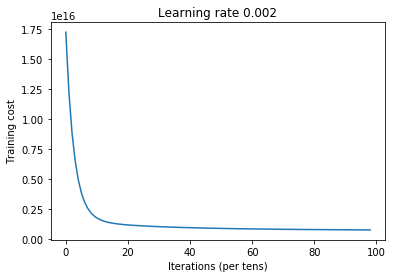

In [29]:
linear_regression_model(x,y,X,Y,0.002,10000)